In [30]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=139284 sha256=de018df751dfc80c2dcb0f23a260b5c67483eb3b06765cc0fcdfdd2680ce020d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yidi65e9/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


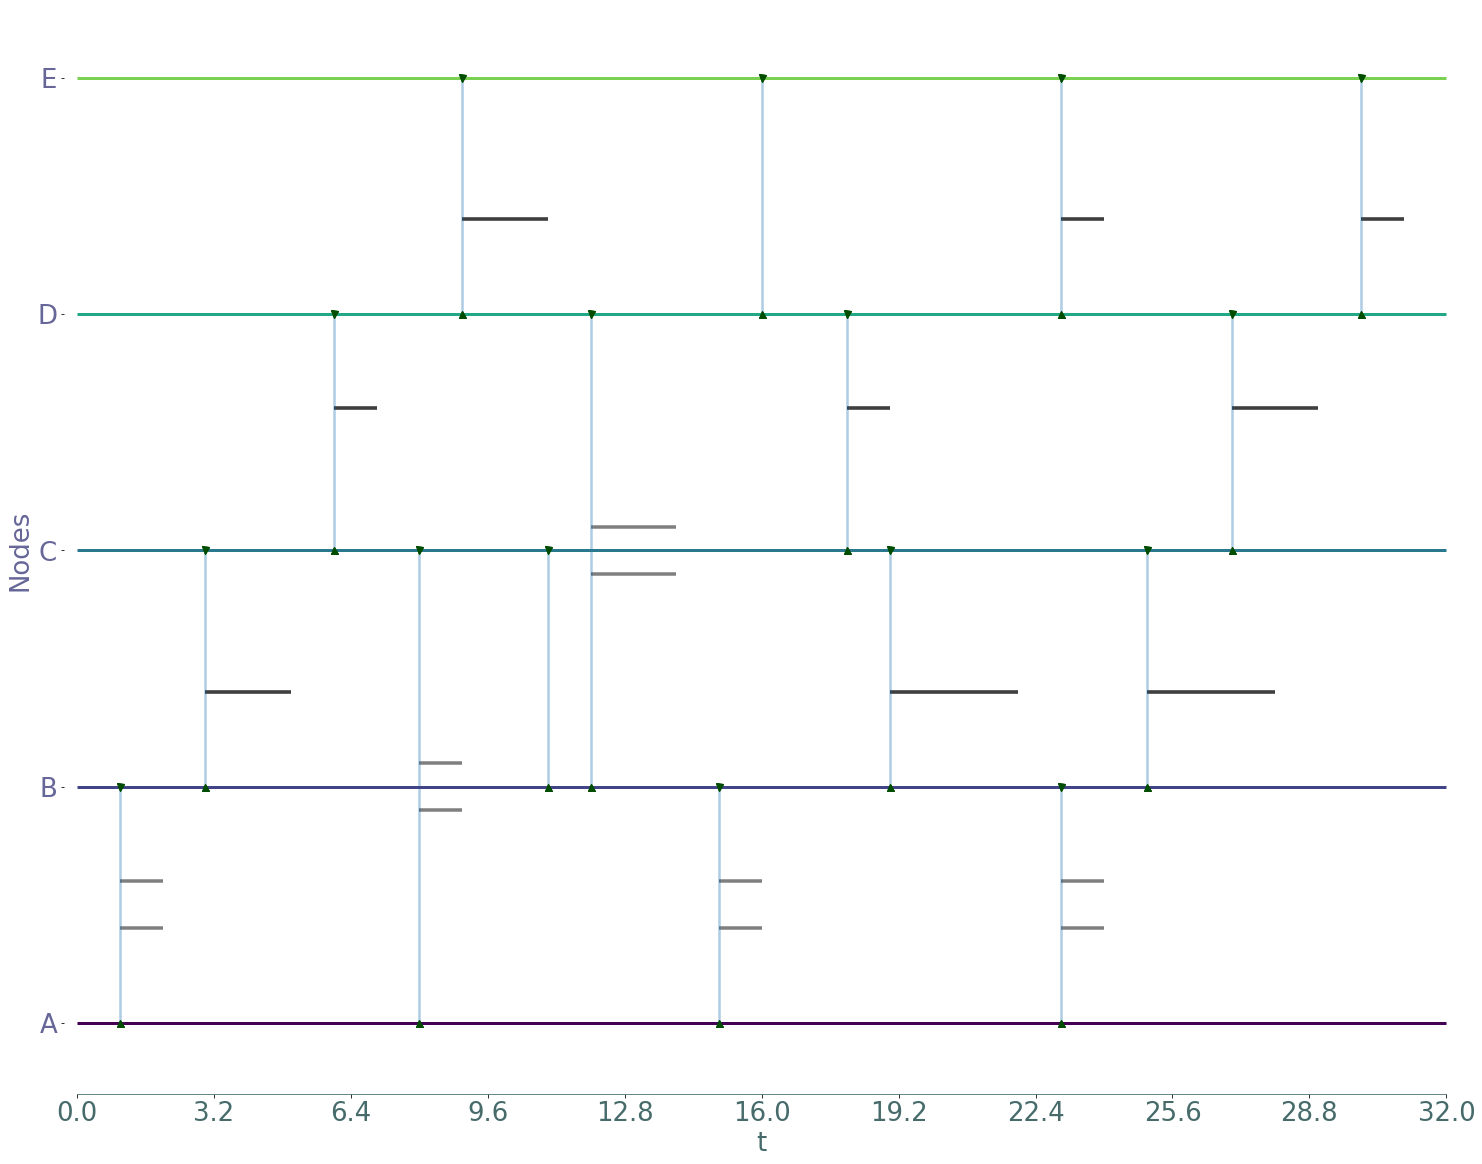

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
nouveau = S.fragmented_stream_graph()
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [4]:
node = 0

In [5]:
events = list(nouveau.event_times())
events.sort()
events_reverse = dict()
for i in range(0,len(events)):
    events_reverse[events[i]] = i 

In [6]:
link_ind = bt.link_index(nouveau)

In [7]:
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)

In [9]:
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat3, lat_rev3 = nouveau.latencies_without_0_and_rev(lat, events)

In [10]:
G = bt.predecessor_graph(nouveau, pre,node)

In [11]:
GG = bt.graph_to_ordered(G, events, events_reverse)

In [12]:
Gp = bt.instant_graphs(G)

In [13]:
import networkx as nx
GT = dict()
for e in Gp:
    #print(e)
    GT[e] = Gp[e].transitive_closure_dag( topo_order=None)
    #if e == (23,24):
        #fig, ax = plt.subplots(figsize=(30,30))
        #nx.draw_networkx(GT[e].graph,arrows=True,width = 1,ax = ax)

In [14]:
before, after = bt.volume_instantenuous(nouveau, G, GT, events, events_reverse)

In [15]:
length = []
for e in GT:
    length.append(max( GT[e].graph[i][j]["weight"]  for (i,j) in  GT[e].edges()))
mx = max(length) +1
print(mx)

2


In [16]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)

In [17]:
f_edge = bt.dictionary_first_edge(G)
#print(f_edge)

In [18]:
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [20]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev3,events[0],events[len(events)-1], before, after)

In [21]:
contribution = dict()
for k in nouveau.nodes:
    contribution[k] = dict()

In [22]:
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat3[v] }  for v in nouveau.nodes } 

In [23]:
latence_depar = {v : { x : [y,z] for (x,y,z) in lat3[v] }  for v in nouveau.nodes } 

In [25]:
deltasvvt = dict()
for (x,y) in G.nodes():
    deltasvvt[(x,y)] = bt.contri_delta_svvt_con(node, x, y, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [30]:
l = G.sources()
for star_node in l:
    contribution = bt.contri_delta_svt(node, star_node[0], star_node[1], GG.l_nei, sigma_r, contribution, deltasvvt, events, events_reverse, pre, GT, unt)
#contribution = bt.contri_delta_svt(node, 2 ,28, GG.l_nei, sigma_r, contribution, deltasvvt, events, events_reverse, pre, GT, unt)

In [31]:
for k in contribution:
    for e in contribution[k].keys():
        print(k,e,"=>" ,contribution[k][e])

0 1.0 => vol(0.0,0)
0 2.0 => vol(0.0,0)
0 15.0 => vol(0.0,0)
0 16.0 => vol(0.0,0)
0 23.0 => vol(0.0,0)
0 24.0 => vol(0.0,0)
0 8.0 => vol(0.0,0)
0 9.0 => vol(0.0,0)
1 1.0 => vol(0.0,0)
1 5.0 => vol(27.0,-1)
1 3.0 => vol(64.0,0)
1 2.0 => vol(64.0,0)
1 15.0 => vol(0.0,0)
1 22.0 => vol(0.0,-1)
1 18.0 => vol(183.0,0)
1 19.0 => vol(183.0,0)
1 16.0 => vol(183.0,0)
1 23.0 => vol(0.0,0)
1 28.0 => vol(8.727272727272727,-1)
1 27.0 => vol(13.09090909090909,0)
1 25.0 => vol(273.0,0)
1 24.0 => vol(273.0,0)
1 14.0 => vol(49.0,-1)
1 12.0 => vol(197.0,0)
1 11.0 => vol(225.0,0)
2 7.0 => vol(42.0,-1)
2 6.0 => vol(54.0,0)
2 5.0 => vol(54.0,0)
2 3.0 => vol(10.0,0)
2 22.0 => vol(0,0)
2 19.0 => vol(183.0,0)
2 29.0 => vol(26.18181818181818,-1)
2 28.0 => vol(26.18181818181818,0)
2 27.0 => vol(154.9090909090909,0)
2 25.0 => vol(105.0,0)
2 8.0 => vol(0.0,0)
2 12.0 => vol(0,0)
2 14.0 => vol(0,0)
2 15.0 => vol(0,0)
2 16.0 => vol(0,0)
2 18.0 => vol(0.0,-1)
2 11.0 => vol(225.0,0)
2 9.0 => vol(225.0,0)
3 11.0 => vol(